In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
def plot_percent_change(tickers, start_date, end_date):
    # Fetch data
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    
    # Calculate percent change
    percent_change = data.pct_change().fillna(0)
    
    # Plot percent change for each stock
    plt.figure(figsize=(14, 8))
    for ticker in tickers:
        plt.plot(percent_change.index, percent_change[ticker], label=ticker)
    
    # Adding labels and title
    plt.xlabel("Date")
    plt.ylabel("Percent Change (%)")
    plt.title("Percent Change of Stock Prices Over Time")
    plt.legend()
    plt.grid()
    plt.show()


In [3]:
def plot_portfolio(tickers, start_date, end_date, risk_free_rate=0.01):
    # Fetch data
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    
    # Calculate daily returns
    daily_returns = data.pct_change().fillna(0)
    
    # Even weights for each stock in the portfolio
    num_stocks = len(tickers)
    weights = np.ones(num_stocks) / num_stocks
    
    # Calculate portfolio daily returns and cumulative returns
    portfolio_returns = daily_returns.dot(weights)
    cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1

    # Plot cumulative portfolio returns
    plt.figure(figsize=(14, 8))
    plt.plot(cumulative_portfolio_returns.index, cumulative_portfolio_returns, label="Even-weighted Portfolio")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title("Cumulative Return of Even-weighted Portfolio Over Time")
    plt.grid()
    plt.legend()

    # Linear regression for trendline
    dates_ordinal = cumulative_portfolio_returns.index.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
    cumulative_returns_values = cumulative_portfolio_returns.values.reshape(-1, 1)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(dates_ordinal, cumulative_returns_values)
    
    # Predict and calculate R^2 for the regression line
    trendline = model.predict(dates_ordinal)
    r2 = r2_score(cumulative_returns_values, trendline)
    
    # Plot the regression trendline
    plt.plot(cumulative_portfolio_returns.index, trendline, color='red', linestyle='--', label=f"Trendline (R^2={r2:.2f})")
    plt.legend()
    plt.show()
    
    # Display the R-squared value of the regression
    print(f"R-squared of the regression model: {r2:.4f}")


In [4]:
def print_metrics(tickers, start_date, end_date, risk_free_rate=0.01):
    # Fetch data
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    
    # Calculate daily returns
    daily_returns = data.pct_change().fillna(0)
    
    # Even weights for each stock in the portfolio
    num_stocks = len(tickers)
    weights = np.ones(num_stocks) / num_stocks
    
    # Calculate portfolio daily returns
    portfolio_returns = daily_returns.dot(weights)
    
    # Calculate cumulative portfolio returns for max drawdown
    cumulative_returns = (1 + portfolio_returns).cumprod()
    
    # Sharpe Ratio (annualized)
    sharpe_ratio = (portfolio_returns.mean() - risk_free_rate / 252) / portfolio_returns.std() * np.sqrt(252)
    
    # Maximum Drawdown
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdown.min()
    
    # Annualized Volatility
    annual_volatility = portfolio_returns.std() * np.sqrt(252)
    
    # Print metrics
    print("Portfolio Metrics:")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2%}")
    print(f"Annual Volatility: {annual_volatility:.2%}")




[*********************100%***********************]  7 of 7 completed


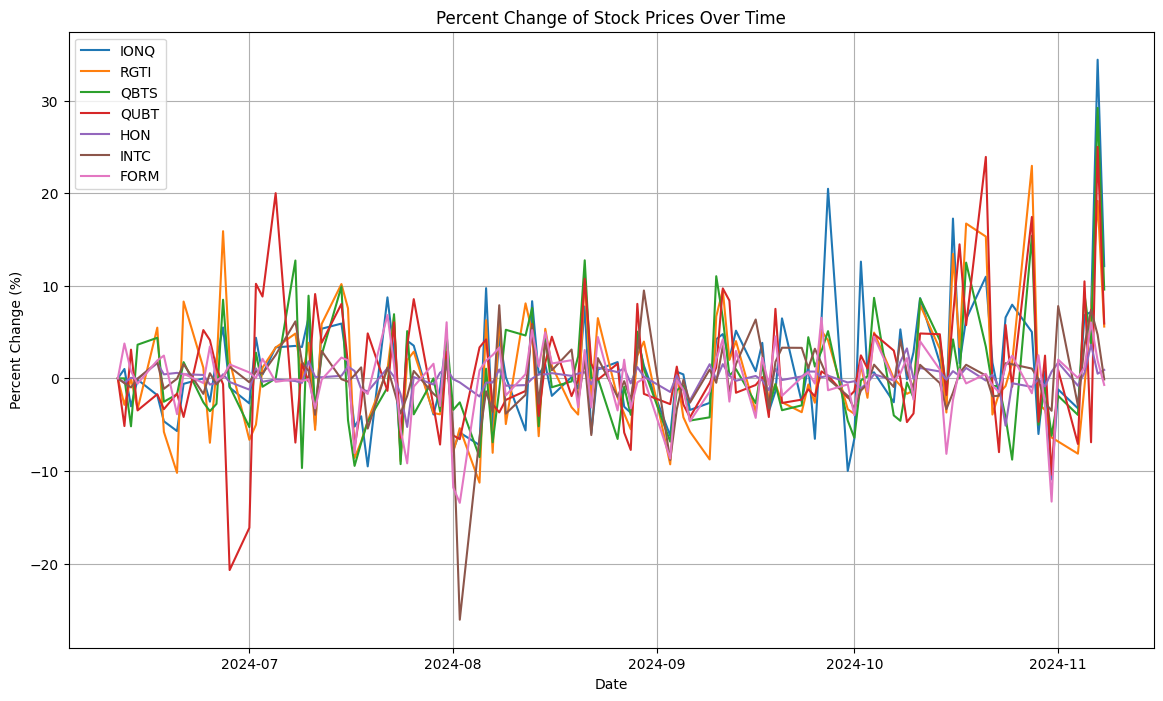

[*********************100%***********************]  7 of 7 completed


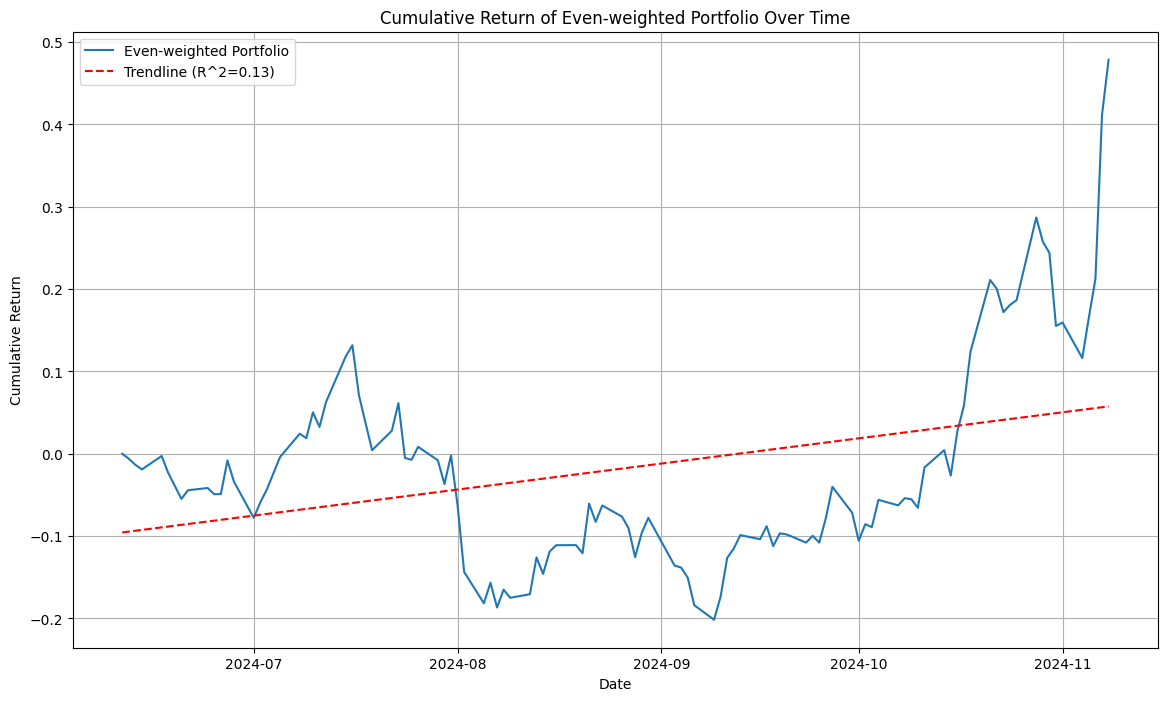

[*********************100%***********************]  7 of 7 completed

R-squared of the regression model: 0.1259
Portfolio Metrics:
Sharpe Ratio: 1.86
Max Drawdown: -29.45%
Annual Volatility: 58.35%


In [ ]:
tickers = ['IONQ', 'RGTI', 'QBTS', 'QUBT', 'HON', 'INTC', 'FORM']  # Replace with your chosen tickers
start_date = '2024-06-11'  # Replace with your start date
end_date = '2024-11-11'    # Replace with your end date


# Plot percent change of individual stocks
plot_percent_change(tickers, start_date, end_date)

# Plot portfolio cumulative returns with trendline
plot_portfolio(tickers, start_date, end_date)

# Print the portfolio metrics
print_metrics(tickers, start_date, end_date)